# **Thailand and the world at the Olympic Games**
**การวิเคราะห์ข้อมูลของการแข่งขันโอลิมปิกใน 120 ปีที่ผ่าน รวมถึงวิเคราะห์ว่าประเทศไทยมีผลงานอย่างไรในโอลิมปิก**

**นำเข้าข้อมูล**

In [1]:
pip install squarify

In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/My Drive/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [8]:
import pandas as pd
import numpy as np
data2 = pd.read_csv('/content/drive/My Drive/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')
data2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [9]:
data2

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


**รวม athlete_events.csv กับ noc_regions.csv เข้าด้วยกัน**

In [10]:
olp_data=data.merge(data2,on='NOC',how='left')
olp_data.head(n=3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [11]:
olp_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


**ค้นหาปีที่มีการจัดกีฬาโอลิมปิก**

In [8]:
print('โอลิมปิกฤดูร้อน :',np.array(sorted(data[data['Season']=='Summer']['Year'].unique())))
print('โอลิมปิกฤดูหนาว :',np.array(sorted(data[data['Season']=='Winter']['Year'].unique())))

โอลิมปิกฤดูร้อน : [1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012
 2016]
โอลิมปิกฤดูหนาว : [1924 1928 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980 1984
 1988 1992 1994 1998 2002 2006 2010 2014]


**ค้นหาเมืองที่เป็นเจ้าบ้านเกมกีฬาโอลิมปิก**

In [9]:
Cities=data.groupby('City').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
Cities.columns=['City','Years']
Cities['Occurence']=[len(c) for c in Cities['Years']]
Cities.sort_values('Occurence',ascending=False)

,City,Years,Occurence
3,Athina,"[2004, 1906, 1896]",3
17,London,"[2012, 1948, 1908]",3
30,Sankt Moritz,"[1928, 1948]",2
26,Paris,"[1900, 1924]",2
37,Stockholm,"[1912, 1956]",2
18,Los Angeles,"[1932, 1984]",2
15,Lake Placid,"[1980, 1932]",2
14,Innsbruck,"[1964, 1976]",2
0,Albertville,[1992],1
27,Rio de Janeiro,[2016],1


**ความสัมพันธ์ระหว่างอายุน้ำหนักและส่วนสูงของนักกีฬาโอลิมปิก**

In [10]:
data[['Age','Height','Weight']].corr()

,Age,Height,Weight
Age,1.000000,0.138246,0.212069
Height,0.138246,1.000000,0.796213
Weight,0.212069,0.796213,1.000000


**การมีส่วนร่วมของชายและหญิงในการแข่งขันกีฬาโอลิมปิก**

In [11]:
print('จำนวนนักกีฬาทั้งหมดที่เข้าร่วมการแข่งขันกีฬาโอลิมปิก :',len(data.ID.unique()))

จำนวนนักกีฬาทั้งหมดที่เข้าร่วมการแข่งขันกีฬาโอลิมปิก : 135571


In [12]:
print('จำนวนนักกีฬาหญิงที่เข้าร่วม :',len(data[data.Sex=='F']))
print('จำนวนนักกีฬาชายที่เข้าร่วม :',len(data[data.Sex=='M']))

จำนวนนักกีฬาหญิงที่เข้าร่วม : 74522
จำนวนนักกีฬาชายที่เข้าร่วม : 196594


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


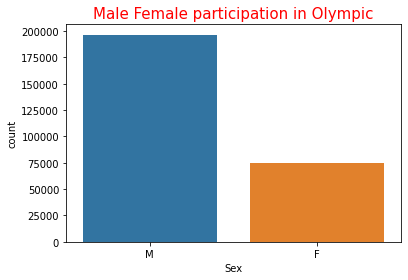

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
import seaborn as sns
data.Sex.unique()
data.Sex.value_counts()
sns.countplot(data.Sex)
plt.title('Male Female participation in Olympic',size=15,color='red')
plt.show()

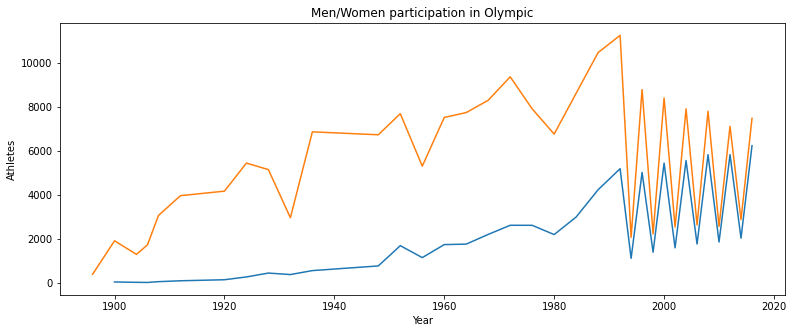

In [14]:
part = data.groupby('Year')['Sex'].value_counts()
part.loc[:,'F'].plot(title='Men/Women participation in Olympic',figsize=(13,5)).set_ylabel("Athletes")
part.loc[:,'M'].plot()

**นักกีฬาเข้าร่วมในโอลิมปิกฤดูร้อน**

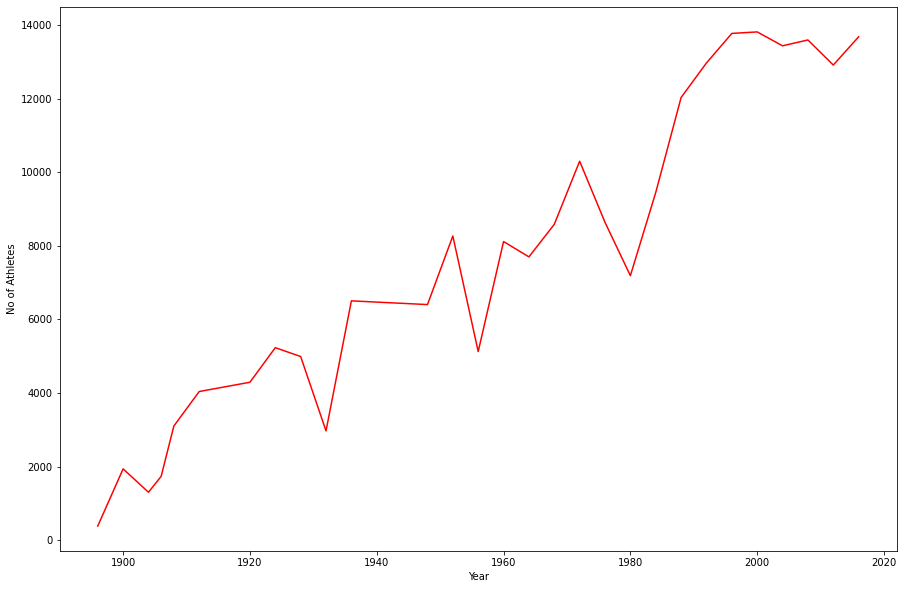

In [15]:
ath=data[data['Season']=='Summer'].groupby('Year')['ID'].count()
plt.figure(figsize=(15, 10))
ath.plot(kind='line',color='red')
plt.xlabel('Year')
plt.ylabel('No of Athletes')
plt.show()

**นักกีฬาเข้าร่วมในโอลิมปิกฤดูหนาว**

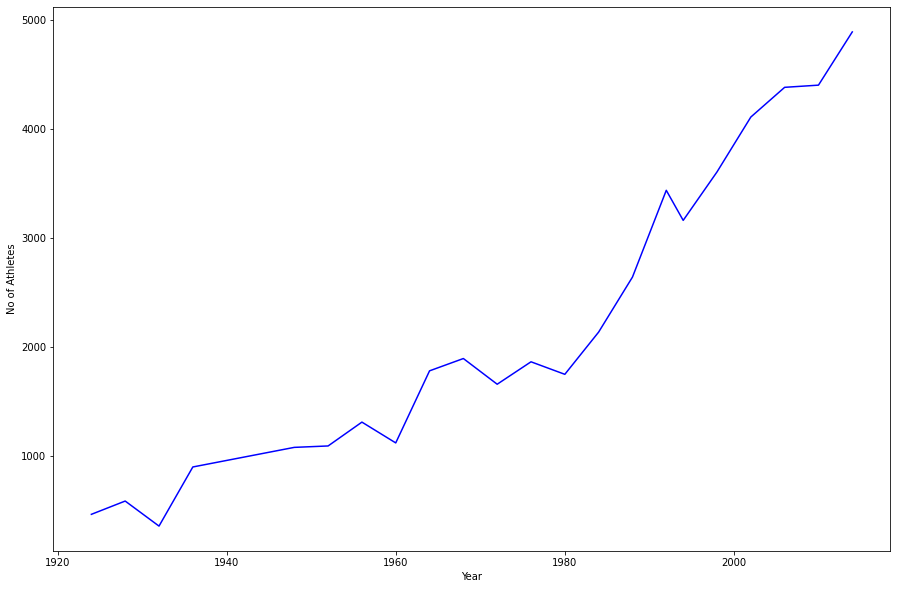

In [16]:
ath=data[data['Season']=='Winter'].groupby('Year')['ID'].count()
plt.figure(figsize=(15, 10))
ath.plot(kind='line',color='blue')
plt.xlabel('Year')
plt.ylabel('No of Athletes')
plt.show()

**การค้นหานักกีฬาที่อายุน้อยที่สุด อายุมากที่สุดและอายุมัธยฐาน(ค่ากึ่งกลางของข้อมูล)ให้เข้าร่วมในเกม**

In [17]:
print('นักกีฬาที่อายุน้อยที่สุด :',data.Age.min())
print('อายุเฉลี่ยของนักกีฬา :',data.Age.mean())
print('นักกีฬาที่อายุมากที่สุด :',data.Age.max())

นักกีฬาที่อายุน้อยที่สุด : 10.0
อายุเฉลี่ยของนักกีฬา : 25.556898357297374
นักกีฬาที่อายุมากที่สุด : 97.0


In [0]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np

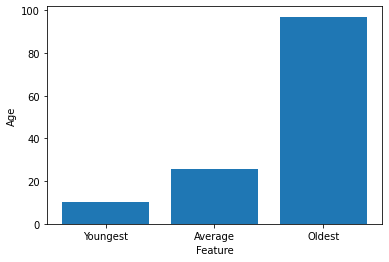

In [19]:
y=np.array([data.Age.min(),data.Age.mean(),data.Age.max()])
x=['Youngest','Average','Oldest']
plt.bar(x,y)
plt.xlabel('Feature')
plt.ylabel('Age')
plt.show()

**ข้อมูลอายุ ความสูง และน้ำหนักของนักกีฬา**

Text(0.5, 1.0, 'Age Distribution of Athletes')

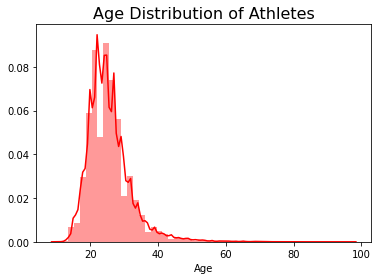

In [20]:
x=sns.distplot(data['Age'].dropna(),color='Red',kde=True)
x.set_title('Age Distribution of Athletes',fontsize=16,fontweight=200)

Text(0.5, 1.0, 'Height Distribution of Athletes')

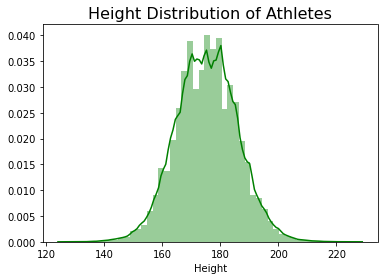

In [21]:
h=sns.distplot(data['Height'].dropna(),color='Green',kde=True)
h.set_title('Height Distribution of Athletes',fontsize=16,fontweight=200)

Text(0.5, 1.0, 'Weight Distribution of Athletes')

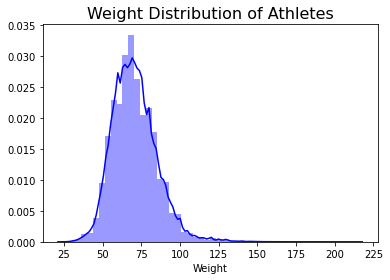

In [22]:
w=sns.distplot(data['Weight'].dropna(),color='Blue',kde=True)
w.set_title('Weight Distribution of Athletes',fontsize=16,fontweight=200)

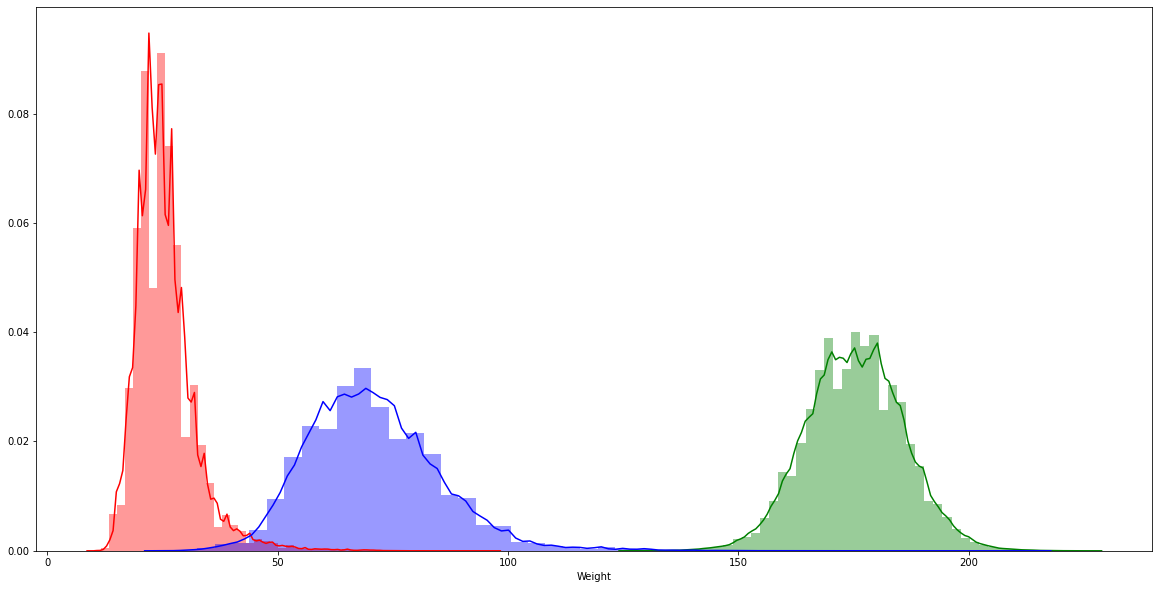

In [23]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(data['Age'].dropna(),color='Red',kde=True)
sns.distplot(data['Height'].dropna(),color='Green',kde=True)
sns.distplot(data['Weight'].dropna(),color='Blue',kde=True)

**10 ประเทศติดอันดับใน 120 ปีของการแข่งขันกีฬาโอลิมปิก**

In [24]:
data.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

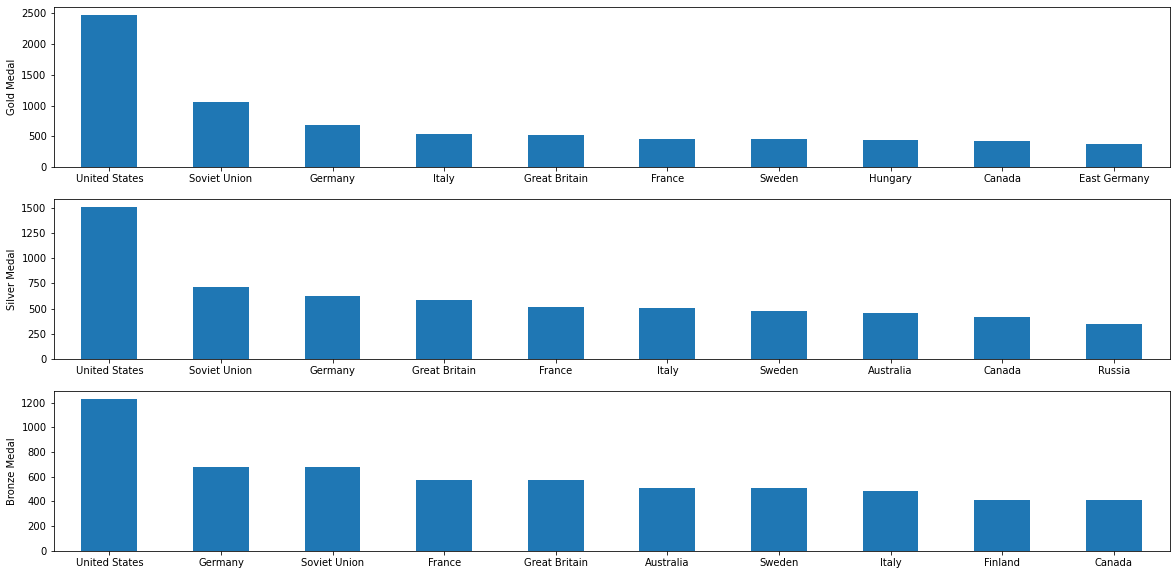

In [25]:
plt.subplot(3,1,1)
gold = data[data.Medal == "Gold"].Team.value_counts().head(10)
gold.plot(kind='bar',rot=0,figsize=(20, 10))
plt.ylabel("Gold Medal")
plt.subplot(3,1,2)
silver = data[data.Medal == "Silver"].Team.value_counts().head(10)
silver.plot(kind='bar',rot=0,figsize=(20, 10))
plt.ylabel("Silver Medal")
plt.subplot(3,1,3)
bronze = data[data.Medal == "Bronze"].Team.value_counts().head(10)
bronze.plot(kind='bar',rot=0,figsize=(20, 10))
plt.ylabel("Bronze Medal")

plt.show()

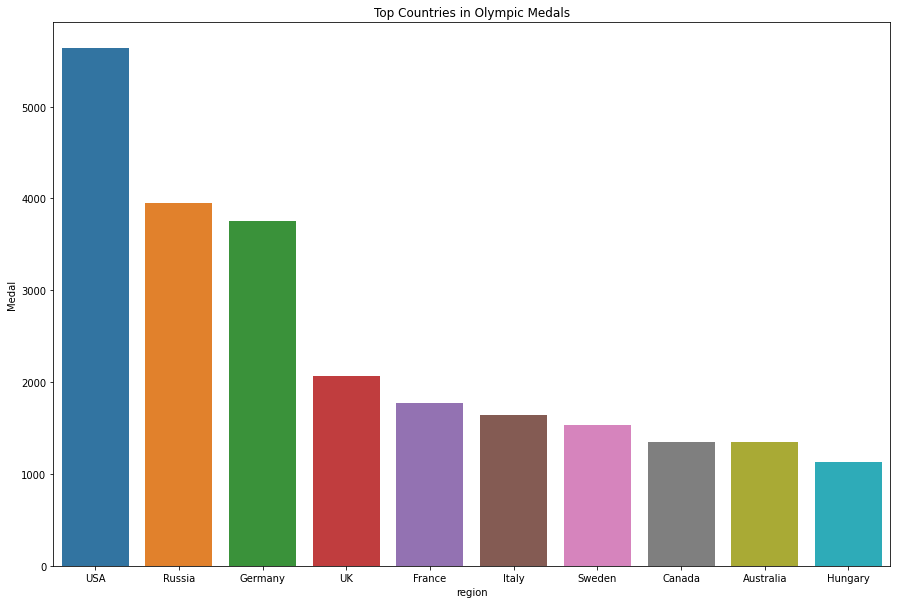

In [26]:
plt.figure(figsize=(15, 10))
topc=olp_data.groupby('region')['Medal'].count().nlargest(10).reset_index()
sns.barplot('region','Medal',data=topc)
plt.title('Top Countries in Olympic Medals')
plt.show()

**ประเทศที่ได้รับเหรียญมากที่สุดในแต่ละปี**

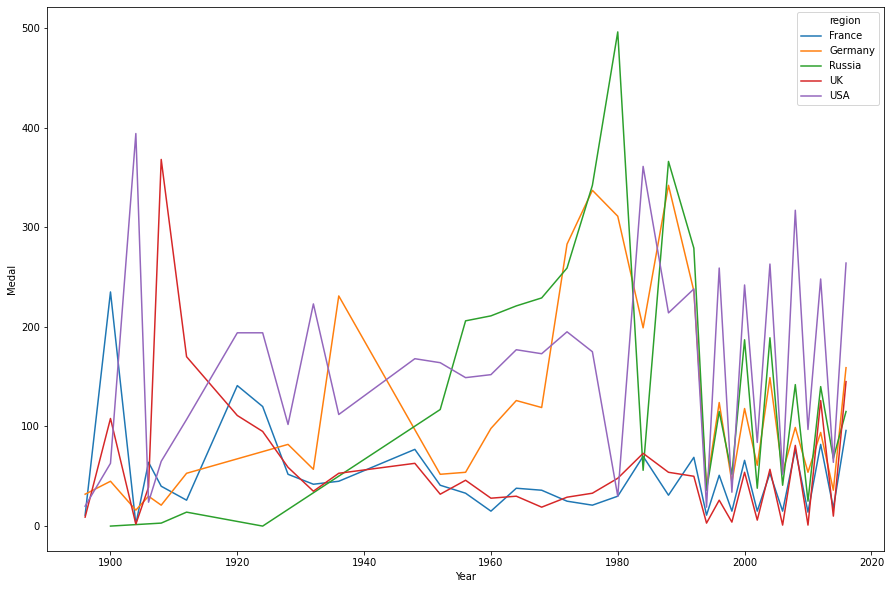

In [27]:
plt.figure(figsize=(15, 10))
topm=olp_data.groupby(['region','Year'])['Medal'].count().reset_index()
topm=topm[topm['region'].isin(olp_data['region'].value_counts()[:5].index)]
#topm=topm.pivot('region','Year','Medal').fillna(0)
sns.lineplot(topm['Year'],topm['Medal'],hue=topm['region'])

**ประเมินประสิทธิภาพของประเทศไทยในกีฬาโอลิมปิก**

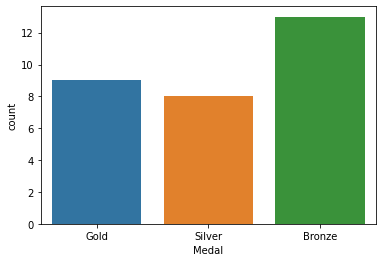

In [28]:
import seaborn as sns
medal=data[data.Medal.notnull()]
Thailand_medals=medal[medal.Team=='Thailand']
Thailand_medals.head()
sns.countplot(x='Medal',data=Thailand_medals)

**รายละเอียดของเกมที่ประเทศไทยได้รับรางวัล เรียงจากเหรียญทอง เหรียญเงิน และเหรียญทองแดง**

In [29]:
gold = data[(data.Medal == 'Gold')]
goldTHA = gold.loc[gold['NOC'] == 'THA']
goldTHA.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Weightlifting Women's Featherweight,2
1,Boxing Men's Flyweight,2
2,Weightlifting Women's Lightweight,1
3,Boxing Men's Featherweight,1
4,Weightlifting Women's Flyweight,1
5,Weightlifting Women's Heavyweight,1
6,Boxing Men's Light-Welterweight,1


In [30]:
Silver = data[(data.Medal == 'Silver')]
SilverTHA = Silver.loc[Silver['NOC'] == 'THA']
SilverTHA.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Weightlifting Women's Lightweight,2
1,Boxing Men's Light-Welterweight,2
2,Boxing Men's Bantamweight,1
3,Taekwondo Women's Flyweight,1
4,Boxing Men's Light-Flyweight,1
5,Taekwondo Men's Flyweight,1


In [31]:
Bronze = data[(data.Medal == 'Bronze')]
BronzeTHA = Bronze.loc[Bronze['NOC'] == 'THA']
BronzeTHA.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Taekwondo Women's Flyweight,3
1,Boxing Men's Bantamweight,2
2,Weightlifting Women's Lightweight,2
3,Boxing Men's Light-Flyweight,1
4,Boxing Men's Light-Middleweight,1
5,Weightlifting Men's Bantamweight,1
6,Weightlifting Women's Flyweight,1
7,Boxing Men's Middleweight,1
8,Boxing Men's Welterweight,1


**รายละเอียดของนักกีฬาของประเทศไทยทั้งหมดที่ไปแข่งกีฬาโอลิมปิก**

In [53]:
MedalsTHA = olp_data[olp_data['NOC'] == 'THA']
MedalsTHA

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
2680,1494,Mongkol Aimmanolrom,M,NaN,NaN,NaN,Thailand,THA,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,NaN,Thailand,NaN
5817,3276,Ampol Amaluktipituk,M,34.0,171.0,63.0,Thailand,THA,1984 Summer,1984,Summer,Los Angeles,Archery,Archery Men's Individual,NaN,Thailand,NaN
6154,3463,Savitree Amitrapai,F,27.0,164.0,56.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,NaN,Thailand,NaN
8533,4691,Kiradech Aphibarnrat,M,27.0,172.0,104.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Men's Individual,NaN,Thailand,NaN
8994,4947,Sailom Ard,M,22.0,172.0,57.0,Thailand,THA,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Featherweight,NaN,Thailand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265774,132983,Phathanyu Yimsumruay,M,21.0,175.0,68.0,Thailand,THA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Individual Medley,NaN,Thailand,NaN
265933,133054,Supatra Yompakdee,F,30.0,160.0,85.0,Thailand,THA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Women's Heavyweight,NaN,Thailand,NaN
266731,133436,Amorn Yuktanandana,M,32.0,173.0,70.0,Thailand,THA,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN,Thailand,NaN
266732,133436,Amorn Yuktanandana,M,36.0,173.0,70.0,Thailand,THA,1964 Summer,1964,Summer,Tokyo,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN,Thailand,NaN


In [12]:
olp_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


**นักกีฬาหญิงทั้งหมดของประเทศไทย**

In [20]:
Ftha = olp_data[(olp_data.Sex == 'F')]
Female = Ftha.loc[Ftha['NOC'] == 'THA']
Female

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6154,3463,Savitree Amitrapai,F,27.0,164.0,56.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,NaN,Thailand,NaN
21194,11192,Arunee Bhanubandh (Chultakosin-),F,34.0,NaN,NaN,Linglom,THA,1964 Summer,1964,Summer,Tokyo,Sailing,Sailing Mixed Three Person Keelboat,NaN,Thailand,NaN
21245,11217,Siriwan Bhudvanbhen,F,17.0,169.0,50.0,Thailand,THA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Women's Air Rifle, 10 metres",NaN,Thailand,NaN
25537,13344,Wanida Boonwan,F,25.0,165.0,53.0,Thailand,THA,2012 Summer,2012,Summer,London,Athletics,Athletics Women's High Jump,NaN,Thailand,NaN
25543,13347,Yaowapa Boorapolchai,F,19.0,159.0,49.0,Thailand,THA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Flyweight,Bronze,Thailand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264586,132401,Rampai Yamfang-Sriyai,F,37.0,151.0,55.0,Thailand,THA,1992 Summer,1992,Summer,Barcelona,Shooting,"Shooting Women's Sporting Pistol, 25 metres",NaN,Thailand,NaN
264971,132582,Naphaswan Yangpaiboon,F,24.0,162.0,66.0,Thailand,THA,2012 Summer,2012,Summer,London,Shooting,"Shooting Women's Air Pistol, 10 metres",NaN,Thailand,NaN
264972,132582,Naphaswan Yangpaiboon,F,24.0,162.0,66.0,Thailand,THA,2012 Summer,2012,Summer,London,Shooting,"Shooting Women's Sporting Pistol, 25 metres",NaN,Thailand,NaN
265773,132982,Budsabong Yimploy,F,17.0,159.0,50.0,Thailand,THA,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Thailand,NaN


**จำนวนนักกีฬาหญิงทั้งหมดของประเทศไทย**

In [22]:
Female.Name.count()

214

**นักกีฬาขายทั้งหมดของประเทศไทย**

In [23]:
Mtha = olp_data[(olp_data.Sex == 'M')]
Male = Mtha.loc[Mtha['NOC'] == 'THA']
Male

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
2680,1494,Mongkol Aimmanolrom,M,NaN,NaN,NaN,Thailand,THA,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,NaN,Thailand,NaN
5817,3276,Ampol Amaluktipituk,M,34.0,171.0,63.0,Thailand,THA,1984 Summer,1984,Summer,Los Angeles,Archery,Archery Men's Individual,NaN,Thailand,NaN
8533,4691,Kiradech Aphibarnrat,M,27.0,172.0,104.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Men's Individual,NaN,Thailand,NaN
8994,4947,Sailom Ard,M,22.0,172.0,57.0,Thailand,THA,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Featherweight,NaN,Thailand,NaN
8995,4947,Sailom Ard,M,26.0,172.0,57.0,Thailand,THA,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Lightweight,NaN,Thailand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265253,132746,Kunathip Yea-On,M,20.0,193.0,148.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Heavyweight,NaN,Thailand,NaN
265774,132983,Phathanyu Yimsumruay,M,21.0,175.0,68.0,Thailand,THA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Individual Medley,NaN,Thailand,NaN
266731,133436,Amorn Yuktanandana,M,32.0,173.0,70.0,Thailand,THA,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN,Thailand,NaN
266732,133436,Amorn Yuktanandana,M,36.0,173.0,70.0,Thailand,THA,1964 Summer,1964,Summer,Tokyo,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN,Thailand,NaN


**จำนวนนักกีฬาชายทั้งหมดของประเทศไทย**

In [24]:
Male.Name.count()

533

**รายชื่อนักกีฬาหญิงของประเทศไทยที่ได้รับเหรียญทอง เหรียญเงิน และเหรียญทองแดง ตามลำดับ**



In [47]:
FemaleG = Female.loc[Ftha['Medal'] == 'Gold']
FemaleG

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
106625,53926,Prapawadee Jaroenrattanatarakoon,F,24.0,157.0,54.0,Thailand,THA,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Featherweight,Gold,Thailand,NaN
191019,95926,Udomporn Polsak,F,22.0,150.0,53.0,Thailand,THA,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Featherweight,Gold,Thailand,NaN
226961,114059,Sukanya Srisurat,F,21.0,155.0,58.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Lightweight,Gold,Thailand,NaN
236100,118369,Sopita Tanasan,F,21.0,154.0,48.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Flyweight,Gold,Thailand,NaN
239478,120025,Pawina Thongsuk,F,25.0,156.0,68.0,Thailand,THA,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Heavyweight,Gold,Thailand,NaN


In [49]:
FemaleS = Female.loc[Ftha['Medal'] == 'Silver']
FemaleS

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
194038,97405,Buttree Puedpong,F,17.0,157.0,49.0,Thailand,THA,2008 Summer,2008,Summer,Beijing,Taekwondo,Taekwondo Women's Flyweight,Silver,Thailand,NaN
221620,111381,Pimsiri Sirikaew,F,22.0,152.0,58.0,Thailand,THA,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Women's Lightweight,Silver,Thailand,NaN
221621,111381,Pimsiri Sirikaew,F,26.0,152.0,58.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Lightweight,Silver,Thailand,NaN


In [50]:
FemaleB = Female.loc[Ftha['Medal'] == 'Bronze']
FemaleB

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
25543,13347,Yaowapa Boorapolchai,F,19.0,159.0,49.0,Thailand,THA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Flyweight,Bronze,Thailand,NaN
112610,57039,Wandee Kameaim,F,26.0,150.0,58.0,Thailand,THA,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Lightweight,Bronze,Thailand,NaN
225260,113175,Chanatip Sonkham,F,21.0,166.0,49.0,Thailand,THA,2012 Summer,2012,Summer,London,Taekwondo,Taekwondo Women's Flyweight,Bronze,Thailand,NaN
232640,116691,Khassaraporn Suta,F,28.0,150.0,57.0,Thailand,THA,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Women's Lightweight,Bronze,Thailand,NaN
261979,131078,Arlee Wiratthaworn,F,24.0,149.0,48.0,Thailand,THA,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Flyweight,Bronze,Thailand,NaN
262712,131451,Panipak Wongpattanakit,F,18.0,173.0,49.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Thailand,NaN


**รายชื่อนักกีฬาชายของประเทศไทยที่ได้รับเหรียญทอง เหรียญเงิน และเหรียญทองแดง ตามลำดับ**



In [48]:
MaleG = Male.loc[Mtha['Medal'] == 'Gold']
MaleG

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
25512,13332,Manut Boonjumnong,M,24.0,173.0,64.0,Thailand,THA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Light-Welterweight,Gold,Thailand,NaN
110296,55784,Somjit Jongjohor,M,33.0,167.0,51.0,Thailand,THA,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Flyweight,Gold,Thailand,NaN
112759,57122,Somluck Kamsing,M,23.0,171.0,57.0,Thailand,THA,1996 Summer,1996,Summer,Atlanta,Boxing,Boxing Men's Featherweight,Gold,Thailand,NaN
191226,96034,Wijan Ponlid,M,24.0,162.0,51.0,Thailand,THA,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Flyweight,Gold,Thailand,NaN


In [51]:
MaleS = Male.loc[Mtha['Medal'] == 'Silver']
MaleS

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
25513,13332,Manut Boonjumnong,M,28.0,173.0,64.0,Thailand,THA,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Light-Welterweight,Silver,Thailand,NaN
90102,45656,Tawin Hanprab,M,18.0,176.0,58.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Flyweight,Silver,Thailand,NaN
186513,93770,Worapoj Petchkoom,M,23.0,170.0,54.0,Thailand,THA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Bantamweight,Silver,Thailand,NaN
191201,96021,Kaeo Pongprayoon,M,32.0,160.0,49.0,Thailand,THA,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Flyweight,Silver,Thailand,NaN
246272,123316,Thawee Umponmaha,M,24.0,167.0,63.0,Thailand,THA,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Light-Welterweight,Silver,Thailand,NaN


In [52]:
MaleB = Male.loc[Mtha['Medal'] == 'Bronze']
MaleB

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
39640,20388,Arkom Chenglai,M,22.0,170.0,67.0,Thailand,THA,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Welterweight,Bronze,Thailand,NaN
116666,59029,Vichai Khadpo,M,28.0,163.0,51.0,Thailand,THA,1996 Summer,1996,Summer,Atlanta,Boxing,Boxing Men's Bantamweight,Bronze,Thailand,NaN
127578,64302,Sinphet Kruaithong,M,20.0,159.0,56.0,Thailand,THA,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Bantamweight,Bronze,Thailand,NaN
162556,81622,Phajol Moolsan,M,20.0,163.0,54.0,Thailand,THA,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Bantamweight,Bronze,Thailand,NaN
191365,96097,Payao Poontarat,M,18.0,165.0,48.0,Thailand,THA,1976 Summer,1976,Summer,Montreal,Boxing,Boxing Men's Light-Flyweight,Bronze,Thailand,NaN
192717,96756,Suriya Prasathinphimai,M,24.0,175.0,75.0,Thailand,THA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,Bronze,Thailand,NaN
239473,120021,Pornchai Thongburan,M,26.0,173.0,71.0,Thailand,THA,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Light-Middleweight,Bronze,Thailand,NaN


**มีนักกีฬาไทยที่ไปแข่งกีฬาโอลิมปิกทั้งหมด**

In [55]:
MedalsTHA.Name.count()

747

**การเข้าร่วมในกีฬาประเภทต่างๆของประเทศไมยในโอลิมปิก**

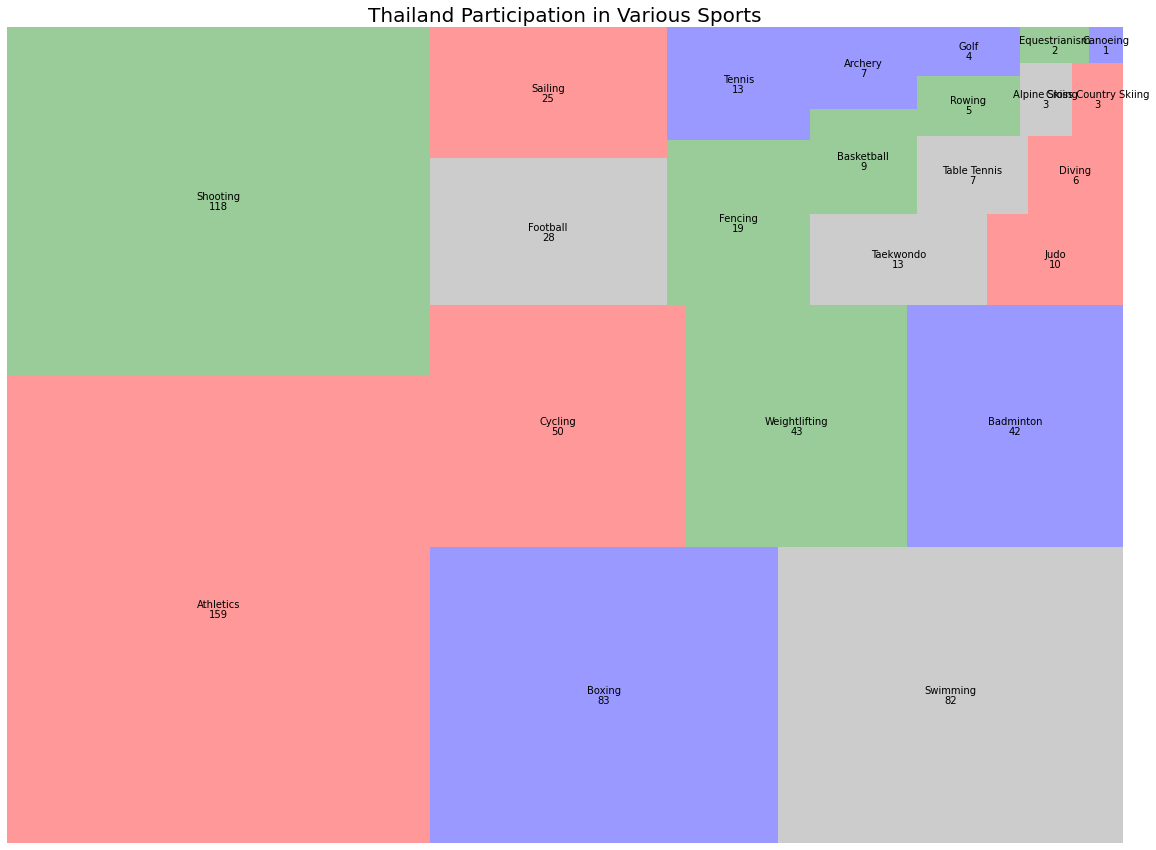

In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
%matplotlib inline

tha_sport = data[data['Team']=='Thailand']['Sport'].value_counts().head(30)
plt.figure(figsize=(20,15))
g = squarify.plot(sizes=tha_sport.values, label=tha_sport.index, 
                  value=tha_sport.values,
                  alpha=.4,color=["red","green","blue", "grey"])
g.set_title("Thailand Participation in Various Sports",fontsize=20)
g.set_axis_off()
plt.show()